<a href="https://colab.research.google.com/github/Fedryus/Ejercicios-IA/blob/master/Keras_Clasificador_de_Numerosv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


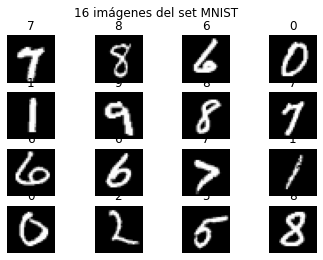




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                11775     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                160       
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________
None


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/50





 - 1s - loss: 1.1345 - acc: 0.6675
Epoch 2/50
 - 0s - loss: 0.4732 - acc: 0.8708
Epoch 3/50
 - 0s - loss: 0.3808 - acc: 0.8918
Epoch 4/50
 - 0s - loss: 0.3404 - acc: 0.9029
Epoch 5/50
 - 0s - loss: 0.3163 - acc: 0.9088
Epoch 6/50
 - 0s - loss: 0.2989 - acc: 0.9140
Epoch 7/50
 - 0s - loss: 0.2864 - acc: 0.9170
Epoch 8/50
 - 0s - loss: 0.2766 - acc: 0.9204
Epoch 9/50
 - 0s - loss: 0.2686 

In [2]:
# Set de datos: MNIST
#
# Contiene 60,000 datos de entrenamiento y 10,000 de validación. 
# Cada imagen es de 28x28 pixeles. La clasificación se llevará a cabo
# usando una red neuronal con una capa oculta que contiene 15 neuronas.
# 
# codificandobits.com - 2018

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import np_utils

import matplotlib.pyplot as plt
import numpy as np

#
# Lectura, visualización y pre-procesamiento de los datos
#

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Visualizaremos 16 imágenes aleatorias tomadas del set x_train
ids_imgs = np.random.randint(0,x_train.shape[0],16)
for i in range(len(ids_imgs)):
	img = x_train[ids_imgs[i],:,:]
	plt.subplot(4,4,i+1)
	plt.imshow(img, cmap='gray')
	plt.axis('off')
	plt.title(y_train[ids_imgs[i]])
plt.suptitle('16 imágenes del set MNIST')
plt.show()

# Pre-procesamiento: para introducirlas a la red neuronal debemos
# "aplanar" cada una de las imágenes en un vector de 28x28 = 784 valores

X_train = np.reshape( x_train, (x_train.shape[0],x_train.shape[1]*x_train.shape[2]) )
X_test = np.reshape( x_test, (x_test.shape[0],x_test.shape[1]*x_test.shape[2]) )

# Adicionalmente se normalizarán las intensidades al rango 0-1
X_train = X_train/255.0
X_test = X_test/255.0

# Finalmente, convertimos y_train y y_test a representación "one-hot"
nclasses = 10
Y_train = np_utils.to_categorical(y_train,nclasses)
Y_test = np_utils.to_categorical(y_test,nclasses)

#
# Creación del modelo:
# - Capa de entrada: su dimensión será 784 (el tamaño de cada imagen aplanada)
# - Capa oculta: 15 neuronas con activación ReLU
# - Capa de salida: función de activación 'softmax' (clasificación multiclase) y un
#     total de 10 categorías
#

np.random.seed(1)		# Para reproducibilidad del entrenamiento
input_dim = X_train.shape[1]
output_dim = Y_train.shape[1]

modelo = Sequential()
modelo.add( Dense(15, input_dim=input_dim, activation='relu'))
modelo.add( Dense(output_dim, activation='softmax'))
print(modelo.summary())

#
# Compilación y entrenamiento: gradiente descendente, learning rate = 0.05, función
# de error: entropía cruzada, métrica de desempeño: precisión

sgd = SGD(lr=0.2)
modelo.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Para el entrenamiento se usarán 30 iteraciones y un batch_size de 1024
num_epochs = 50
batch_size = 1024
historia = modelo.fit(X_train, Y_train, epochs=num_epochs, batch_size=batch_size, verbose=2)

ERROR! Session/line number was not unique in database. History logging moved to new session 59


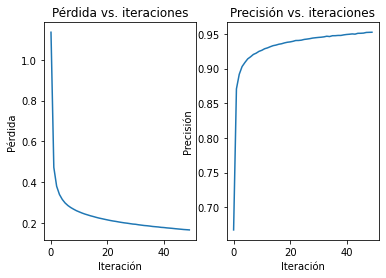

Precisión en el set de validación: 94.8%


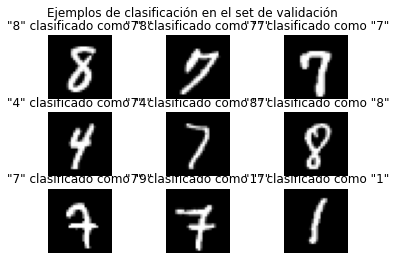

In [3]:
#
# Resultados
#

# Error y precisión vs iteraciones
plt.subplot(1,2,1)
plt.plot(historia.history['loss'])
plt.title('Pérdida vs. iteraciones')
plt.ylabel('Pérdida')
plt.xlabel('Iteración')

plt.subplot(1,2,2)
plt.plot(historia.history['acc'])
plt.title('Precisión vs. iteraciones')
plt.ylabel('Precisión')
plt.xlabel('Iteración')

plt.show()

# Calcular la precisión sobre el set de validación
puntaje = modelo.evaluate(X_test,Y_test,verbose=0)
print('Precisión en el set de validación: {:.1f}%'.format(100*puntaje[1]))

# Realizar predicción sobre el set de validación y mostrar algunos ejemplos
# de la clasificación resultante
Y_pred = modelo.predict_classes(X_test)

ids_imgs = np.random.randint(0,X_test.shape[0],9)
for i in range(len(ids_imgs)):
	idx = ids_imgs[i]
	img = X_test[idx,:].reshape(28,28)
	cat_original = np.argmax(Y_test[idx,:])
	cat_prediccion = Y_pred[idx]

	plt.subplot(3,3,i+1)
	plt.imshow(img, cmap='gray')
	plt.axis('off')
	plt.title('"{}" clasificado como "{}"'.format(cat_original,cat_prediccion))
plt.suptitle('Ejemplos de clasificación en el set de validación')
plt.show()
